In [1]:
import pandas as pd
from scipy import stats
%matplotlib inline
import statsmodels.api as sm
from matplotlib import pyplot as plt
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')


In [2]:
credit_card_exp = pd.read_csv('./creditcard_exp.csv',skipinitialspace = True)  
#skipinitialspace : boolean, default False忽略分隔符后的空白（默认为False，即不忽略）.

In [3]:
credit_card_exp = credit_card_exp.dropna(how='any')

In [4]:
credit_card_exp.head()

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2
3,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.062676,2
5,67,1,816.03,6.704451,1,41,10.03015,0,1,119.76,10.332263,1681,-0.302113,3


In [5]:
credit_card_exp.avg_exp.groupby(credit_card_exp.gender).describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,50.0,925.7052,430.833365,163.18,593.3125,813.650,1204.7775,1992.39
1,20.0,1128.5310,462.281389,648.15,829.8600,1020.005,1238.2025,2430.03


可以看到男性（0）信用卡平均数为925.7，女性（1）信用卡消费平均数为1129，显然男女信用卡消费是有差异的，接下来可以使用双样本t检验查看这种差异是否显著

在使用双样本t检验前，有三个基本条件需要被考虑：

    a.观测之间独立
    b.两组均服从正态分布
    c.两组样本的方差是否相同，视其是否相同采用不同的统计两进行检验

因此在进行双样本t检验前需要进行方差齐性经验。

    方差齐性检验的原假设为两组样本方差相同，检验的统计量F由两组样本方差中的最大值除以最小值得到，可以证明该统计量服从F分布，若抽样结果计算的F值在分布曲线的小概率区间内，意味着差异显著（即两样本方差不同），拒绝原假设，反之相反。

综上所述：双样本t检验的流程如下：
    
    1.获取两组样本数据，计算其均值；
    
    2.进行方差齐性检验；
    
    3.若方差齐，进行方差齐的双样本t检验，若不齐，进行方差不齐的双样本t检验。
    
下面继续研究信用卡消费与性别的关系，先进行方差齐性检验如下：

In [6]:
gender_0 = credit_card_exp[credit_card_exp.gender == 0]['avg_exp']
gender_1 = credit_card_exp[credit_card_exp.gender == 1]['avg_exp']

In [7]:
leveneTestres = stats.levene(gender_0,gender_1,center = 'median')

Levene检验检验所有输入样本均来自方差相等的原假设;

'median'：建议用于偏斜（非正态）分布>

'mean'：建议用于对称，中尾分布。

'trimmed'：建议用于重尾分布。

In [8]:
print('w-value = %6.4f,p-value = %6.4f'%leveneTestres)

w-value = 0.0683,p-value = 0.7946


首先进行方差齐性检验，发现p值是0.6702，不能拒绝原假设，即男性消费样本与女性消费样本的方差是相同的。因此进行方差齐性的双样本t检验：

In [9]:
stats.stats.ttest_ind(gender_0,gender_1,equal_var = True)

Ttest_indResult(statistic=-1.742901386808629, pvalue=0.08587122878448449)

scipy.stats.ttest_ind（a，b，axis = 0，equal_var = True，nan_policy ='propagate' ）

计算两个独立样本得分的平均值的T检验。

这是针对零假设（两个独立样本具有相同的平均（预期）值）的原边检验。该测试假定总体上默认具有相同的方差

进行双样本t检验，并设定方差齐（参数equal_var = True），结果表明p值为0.08，若以0.05为显著性水平，说明男
性与女性在信用卡消费上无显著差异

# 6.4 方差分析

# 6.4.1单因素方差分析（分类变量和连续变量的关系检验）

方差分析用于检验多个样本的均值是否有显著差异，所以其用于分析多余两个分类的分类变量与连续变量的关系。

研究行用卡的消费是否受教育程度影响，可以使用单因素方差分析，其前提条件与双样本t检验相似：
    
    1.获取两组样本数据，计算其均值；
    
    2.进行方差齐性检验；
    
    3.若方差齐，进行方差齐的双样本t检验，若不齐，进行方差不齐的双样本t检验。
    
需要注意的是在方差分析中，原假设为所有组的方差相等，备择假设为至少有两组方差不等。

数据的总误差 = 组内误差 + 组间误差

在Python中进行单因素方差分析可以使用下列方法：

In [10]:
edu = []
for i in range(4):
    edu.append(credit_card_exp[credit_card_exp.edu_class == i]['avg_exp'])
stats.f_oneway(*edu)

F_onewayResult(statistic=31.825683356937645, pvalue=7.658361691248968e-13)

scipy.stats.f_oneway(*args)

Performs a 1-way ANOVA.

从结果上看，F值为31.8，p值接近与0，所以拒绝原假设，即教育程度会显著影响信用卡的消费。

# 6.4.2多因素方差分析

单因素方差分析可以检验一个分类变量与一个连续变量之间的关系（教育程度为分类变量，消费额为连续变量），多因素方差分析可以检验多个分类变量与一个连续变量的关系

# 有交互作用的多因素方差分析

    多个因素搭配在一起会对因变量产生一种新的效应

下面是一个关于信用卡消费与性别、教育程度的关系的实例：
    
    首先考虑无交互作用，代码如下：

In [11]:
from statsmodels.formula.api import ols
ana = ols('avg_exp ~ C(edu_class) + C(gender)',data = credit_card_exp).fit()

In [12]:
sm.stats.anova_lm(ana)

,df,sum_sq,mean_sq,F,PR(>F)
C(edu_class),3.0,8.126056e+06,2.708685e+06,31.578365,1.031496e-12
C(gender),1.0,4.178273e+04,4.178273e+04,0.487111,4.877082e-01
Residual,65.0,5.575481e+06,8.577662e+04,NaN,NaN


单因素方差分析的结果可以看到不同教育程度的平均支出存在差异，而性别对支出则没有显著差异

接下来进行加入交互项的方差分析：
    
    代码如下：

In [13]:
ana1 = ols('avg_exp ~ C(edu_class) + C(gender) + C(edu_class)*C(gender)',data = credit_card_exp).fit()
sm.stats.anova_lm(ana1)

,df,sum_sq,mean_sq,F,PR(>F)
C(edu_class),3.0,8.126056e+06,2.708685e+06,33.839350,3.753889e-13
C(gender),1.0,4.178273e+04,4.178273e+04,0.521988,4.726685e-01
C(edu_class):C(gender),3.0,5.355799e+05,1.785266e+05,2.230316,9.333507e-02
Residual,63.0,5.042862e+06,8.004544e+04,NaN,NaN


可以看到教育程度与性别的交互项对平均支出的影响是显著的。将ana1的基本信息输出：

In [14]:
ana1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     18.12
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           4.35e-12
Time:                        22:18:37   Log-Likelihood:                -490.80
No. Observations:                  70   AIC:                             995.6
Df Residuals:                      63   BIC:                             1011.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          207.3700    200.057      1.037      0.304    -192.412     607.152
C(edu_class)[T.1]                  417.8090    209.367      1.996      0.050      -0.577     836.195
C(edu_class)[T.2]                  732.2613    212.977      3.438      0.001     306.661    1157.861
C(edu_class)[T.3]                 1346.5708    216.086      6.232      0.000     914.757    1778.384
C(gender)[T.1]                      -0.0168     67.939     -0.000      1.000    -135.782     135.749
C(edu_class)[T.1]:C(gender)[T.1]   192.7428    162.889      1.183      0.241    -132.765     518.251
C(edu_class)[T.2]:C(gender)[T.1]    96.8755    110.846      0.874      0.385    -124.632     318.383
C(edu_class)[T.3]:C(gender)[T.1]  -289.6350    109.331     -2.649      0.010    -508.115     -71.155
==============================================================================
Omnibus:                       35.697   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.497
Skew:                           1.590   Prob(JB):                     4.09e-22
Kurtosis:                       7.864   Cond. No.                     2.12e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 6.5 相关分析（两连续变量关系检验）

下面的示例用于探索信用卡消费与收入之间的相关关系，代码如下所示：

In [15]:
credit_card_exp[['Income','avg_exp']].corr(method='pearson')

,Income,avg_exp
Income,1.000000,0.674011
avg_exp,0.674011,1.000000


使用corr函数进行相关分析，从输出结果可以看出，相关系数为0.674，其中method参数除可以指定'pearson'外，还可以指定'spearman'和'kendall'.本例输出的散点图如图6.22所示，从途中可以看出两者具有一定的相关关系

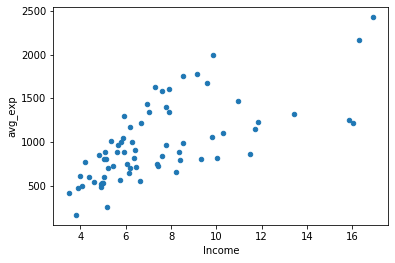

In [16]:
credit_card_exp.plot(x = 'Income',y = 'avg_exp',kind = 'scatter')

# 6.5.2 散点矩阵图

散点矩阵图是由两两变量组合构成的散点图形成的矩阵。从中可以看出两两变量间的相关性，还可以通过其中的线性拟合线查看其中线性或非线性的变化规律

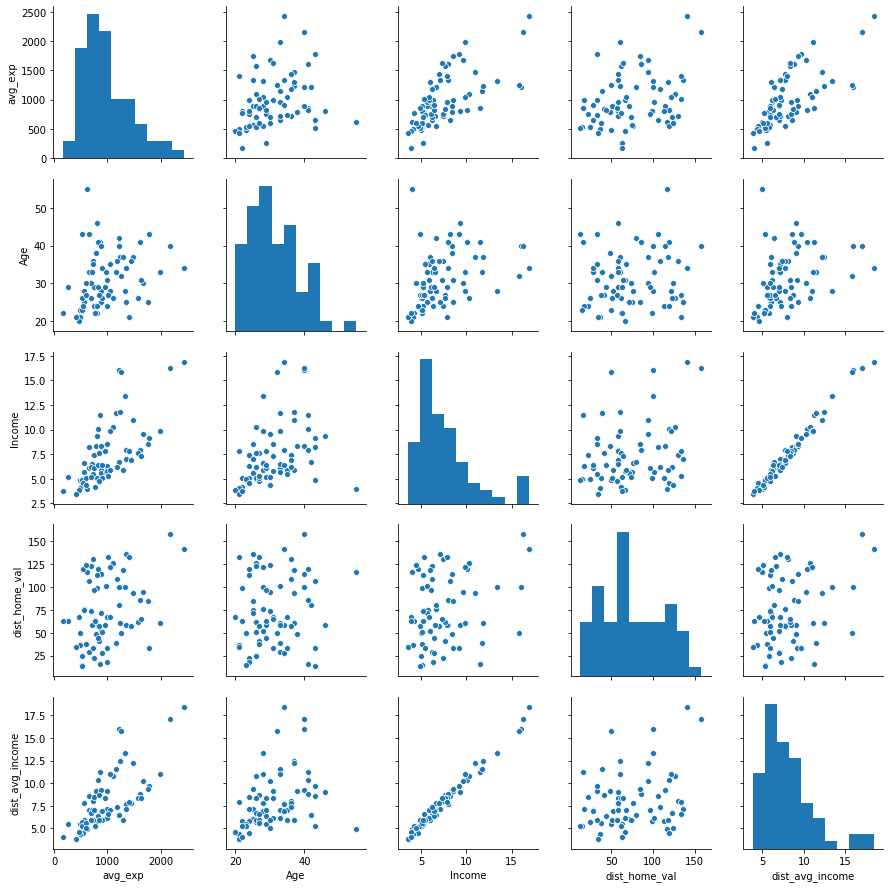

In [17]:
sns.pairplot(credit_card_exp[['avg_exp','Age','Income',
                             'dist_home_val','dist_avg_income']])
plt.show()

接下来还可以通过参数'hue'指定分组变量，这里指定的分组变量是gender（性别）：

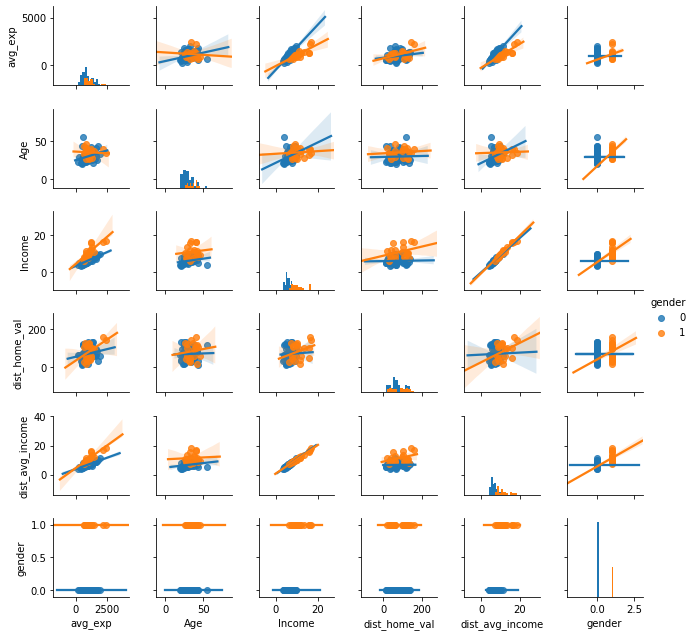

In [18]:
sns.pairplot(credit_card_exp[['avg_exp','Age','Income',
                             'dist_home_val','dist_avg_income','gender']],
            hue = 'gender',kind = 'reg',diag_kind='hist',size = 1.5)
plt.show()

## 6.6卡方检验（两分类变量关系检验）

列联表是一种常见的分类汇总表，该表将待分析的两分类变量中的一个变量的每一个类别设为列变量，另一个变量设为行变量，中间对应着不同变量不同类别下的频数，如下图所示：

![jupyter](./卡方检验.jpg)

本案例生成了一个2行2列的列联表（不包括汇总的行和列，）代码如下：

In [20]:
accepts = pd.read_csv('./accepts.csv')
accepts

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,...,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,...,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1,1.00
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,...,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0,4.75
2,7328510,14323,1,1998.0,PLYMOUTH,N,7.0,10.0,60.0,NaN,...,13595.00,11450.0,0.00,60,10500.00,92.0,2000.00,19600.0,1,1.00
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,...,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1,1.00
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,...,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2291068,10005156,0,1997.0,PORSCHE,N,0.0,21.0,417.0,4.0,...,0.00,31000.0,0.00,36,31000.00,100.0,5000.00,45000.0,1,4.75
5841,7647192,10005616,0,2000.0,TOYOTA,Y,2.0,8.0,62.0,5.0,...,24970.00,22024.0,0.00,60,24970.00,117.0,2400.00,21.0,0,4.75
5842,5993246,10006591,0,1997.0,CHEVROLET,N,0.0,6.0,30.0,4.0,...,20949.00,18950.0,0.00,36,20949.00,113.0,1837.50,25000.0,1,4.75
5843,4766566,10010208,0,1999.0,MERCURY,N,0.0,9.0,67.0,7.0,...,22400.00,28700.0,5300.00,48,17100.00,60.0,28000.00,0.0,0,4.75


In [21]:
cross_table = pd.crosstab(accepts.bankruptcy_ind,accepts.bad_ind,margins=True)
cross_table

bad_ind,0,1,All
bankruptcy_ind,,,
N,4163,1017,5180
Y,345,103,448
All,4508,1120,5628


列联表显示破产状态（bankruptcy_ind = 'Y'）且违约状态正常（bad_ind = 0）的客户有345个，非破产状态bankruptcy_ind = 'N'）且违约状态不正常（bad_ind = 1）的客户相对较少，有103个。

由于样本量的不同，频数的差异并不能直接反应离散变量之间的关系，我们需要将其转换为频率。例如将每个频数与行总计相除，就可以得到行百分比。代码如下所示：

In [22]:
cross_table_rowpct = cross_table.div(cross_table['All'],axis = 0)
cross_table_rowpct

bad_ind,0,1,All
bankruptcy_ind,,,
N,0.803668,0.196332,1.0
Y,0.770089,0.229911,1.0
All,0.800995,0.199005,1.0


这样可以看到破产状态的（bankruptcy_ind = 'Y'）的客户违约率为22.9%，非破产状态的客户违约率为19.6%，那么是否能说明是否破产与是否违约不相关呢？

实际上在生成列联表后，虽然能对比出差异，但是这种差异是否有统计学意义就需要进行检验了，使用的检验方法是卡方检验，其检验统计量可以从列联表的频数计算得来

### 卡方检验的思想在于比较期望频数与实际频数的吻合程度

需要注意的是，卡方检验并不能展现两个分类变量相关性的强弱，只能展现两个分类变量是否相关

接下来，使用Python对违约与破产两个变量进行卡方检验

原假设：   两变量独立，即期望频数 = 实际频数 

备择假设： 两变量相关

In [24]:
print('chisp = %6.4f\n p-value = %6.4f\n dof = %i\n expected_exp = %s'%stats.chi2_contingency(cross_table))

chisp = 2.9167
 p-value = 0.5719
 dof = 4
 expected_exp = [[4149.15422886 1030.84577114 5180.        ]
 [ 358.84577114   89.15422886  448.        ]
 [4508.         1120.         5628.        ]]


检验结果表明：卡方值为2.9167，P值为0.57，表明没有理由拒绝原假设，即二者没有关系